In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Полиномиальные модели

In [3]:
# Регрессия

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML3.1%20polynomial%20features/data/gen_regression.csv", index_col=0)


In [5]:
data.head()

,x,y
0,96.597780,97761.592016
1,48.002892,27613.989207
2,47.939756,29410.187753
3,47.809026,15789.597531
4,69.784427,20953.383453


In [6]:
X = pd.DataFrame(data.x)
y = data.y

In [7]:
X.shape, y.shape

((100, 1), (100,))

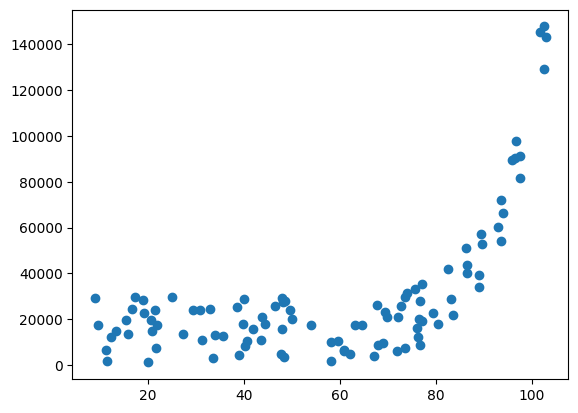

In [8]:
plt.scatter(X, y)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
linear = LinearRegression().fit(X, y)

C:\Users\bulat\PycharmProjects\machineLearning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


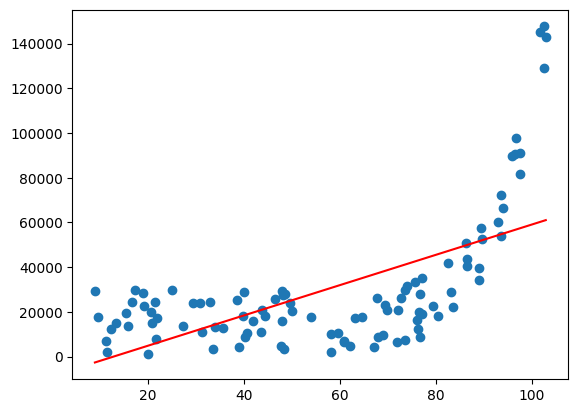

In [11]:
plt.scatter(X, y)

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0), 0.01)
yy = linear.predict(pd.DataFrame(xx))
plt.plot(xx, yy, c='r')

In [12]:
linear.score(X, y)

0.37467360318911636

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
transformation = PolynomialFeatures(degree=2)

In [15]:
transformation.fit(X)

PolynomialFeatures()

In [16]:
X_2 = transformation.transform(X)

In [17]:
X_2.shape

(100, 3)

In [18]:
X_2[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

In [19]:
X[:5]

,x
0,96.597780
1,48.002892
2,47.939756
3,47.809026
4,69.784427


In [20]:
poly_2d = LinearRegression().fit(X_2, y)

In [21]:
poly_2d.score(X_2, y)

0.7359753787024842

C:\Users\bulat\PycharmProjects\machineLearning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


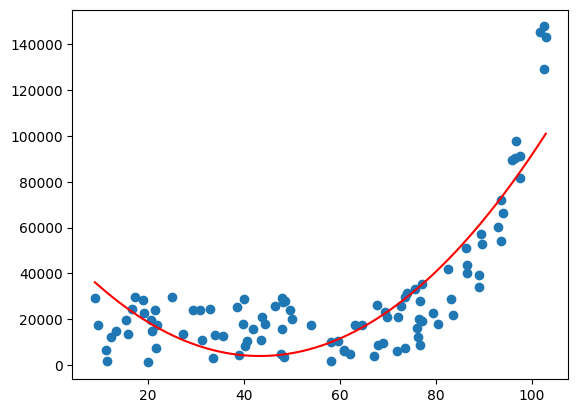

In [22]:
plt.scatter(X, y)

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0), 0.01)
xx_2d = transformation.transform(pd.DataFrame(xx))
yy = poly_2d.predict(pd.DataFrame(xx_2d))
plt.plot(xx, yy, c='r')

In [23]:
transformation = PolynomialFeatures(degree=3)
transformation.fit(X)
X_3 = transformation.transform(X)
poly_3d = LinearRegression().fit(X_3, y)
poly_3d.score(X_3, y)

0.8974477120202289

C:\Users\bulat\PycharmProjects\machineLearning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


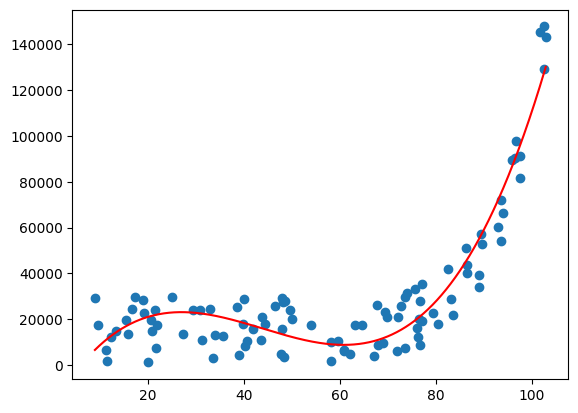

In [24]:
plt.scatter(X, y)

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0), 0.01)
xx_3d = transformation.transform(pd.DataFrame(xx))
yy = poly_3d.predict(pd.DataFrame(xx_3d))
plt.plot(xx, yy, c='r')

In [25]:
import time

# Самост. задание На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.
degrees_reg = [5, 10, 100]
results_reg = []

print("=== Регрессия: gen_regression ===")
for deg in degrees_reg:
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    start_time = time.time()
    model.fit(X_poly, y)
    elapsed = time.time() - start_time
    score = model.score(X_poly, y)
    results_reg.append({"Dataset": "gen_regression", "Model": "LinearRegression", "Degree": deg, "Time (sec)": elapsed, "Score": score})
    print(f"Degree {deg}: Time = {elapsed:.4f} sec, R² = {score:.4f}")
    
results_reg_df = pd.DataFrame(results_reg)


=== Регрессия: gen_regression ===
Degree 5: Time = 0.0010 sec, R² = 0.9217
Degree 10: Time = 0.0010 sec, R² = 0.9222
Degree 100: Time = 0.0095 sec, R² = 0.7925


In [26]:
# Классификация

In [27]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
data.head()

,x1,x2,y
0,0.048289,0.267592,1
1,1.363151,0.171123,0
2,-0.424253,0.893937,0
3,0.112344,0.565672,0
4,-1.262453,0.521735,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      250 non-null    float64
 1   x2      250 non-null    float64
 2   y       250 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.8 KB


In [29]:
data.describe()

,x1,x2,y
count,250.000000,250.000000,250.000000
mean,0.519147,0.261688,0.500000
std,0.946039,0.577398,0.501003
min,-1.500951,-1.062020,0.000000
25%,-0.111585,-0.178776,0.000000
50%,0.484685,0.227917,0.500000
75%,1.196812,0.690127,1.000000
max,2.633769,1.553934,1.000000


In [30]:
y = data.y
X = data.drop(["y"], axis=1)
y.shape, X.shape

((250,), (250, 2))

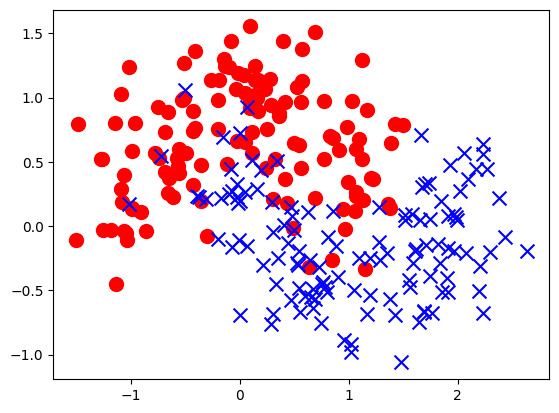

In [31]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logistic = LogisticRegression().fit(X, y)

In [34]:
logistic.score(X, y)

0.832

C:\Users\bulat\PycharmProjects\machineLearning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


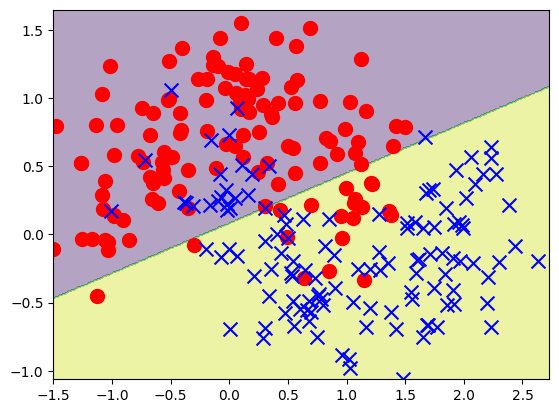

In [35]:
xx, yy = np.meshgrid(
    np.arange(X.min().iloc[0], X.max().iloc[0]+0.1, 0.01),
    np.arange(X.min().iloc[1], X.max().iloc[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [36]:
class_transform = PolynomialFeatures(degree=2, include_bias=False)
X_2 = class_transform.fit_transform(X)

In [37]:
X.head()

,x1,x2
0,0.048289,0.267592
1,1.363151,0.171123
2,-0.424253,0.893937
3,0.112344,0.565672
4,-1.262453,0.521735


In [38]:
X_2[:5]

array([[ 0.04828854,  0.26759214,  0.00233178,  0.01292163,  0.07160555],
       [ 1.36315053,  0.17112252,  1.85817938,  0.23326576,  0.02928292],
       [-0.42425336,  0.89393713,  0.17999091, -0.37925583,  0.79912359],
       [ 0.11234421,  0.5656715 ,  0.01262122,  0.06354992,  0.31998425],
       [-1.26245252,  0.52173531,  1.59378635, -0.65866606,  0.27220774]])

In [39]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

In [40]:
class_3 = LogisticRegression().fit(X_3, y)

C:\Users\bulat\PycharmProjects\machineLearning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


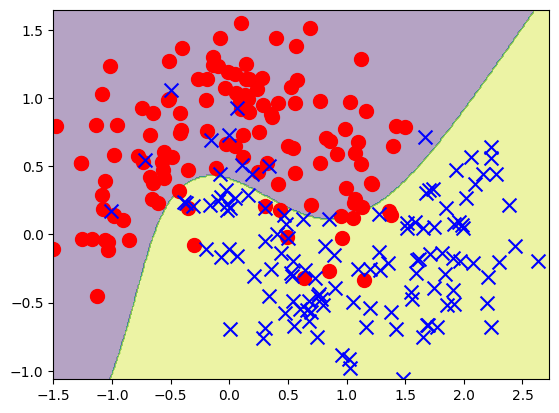

In [41]:
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [42]:
class_3.score(X_3, y)

0.9

In [65]:
# Самост. задание  То же самое проделайте с датасетом для классификации и "King county".

degrees_class = [5, 10, 100]
results_class = []

print("\n=== Классификация: gen_classification ===")
for deg in degrees_class:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly.fit_transform(X)
    model = LogisticRegression(max_iter=1000, random_state=42)
    start_time = time.time()
    model.fit(X_poly, y)
    elapsed = time.time() - start_time
    score = model.score(X_poly, y)
    results_class.append({"Dataset": "gen_classification", "Model": "LogisticRegression", "Degree": deg, "Time (sec)": elapsed, "Score": score})
    print(f"Degree {deg}: Time = {elapsed:.4f} sec, Accuracy = {score:.4f}")
    
results_class_df = pd.DataFrame(results_class)


=== Классификация: gen_classification ===
Degree 5: Time = 0.0104 sec, Accuracy = 0.9160
Degree 10: Time = 0.0180 sec, Accuracy = 0.9240
Degree 100: Time = 0.0701 sec, Accuracy = 0.5000


C:\Users\bulat\PycharmProjects\machineLearning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
# Полиномиальная регрессия на реальных данных

In [45]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [46]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [47]:
data_kc_prices.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [48]:
data_kc_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [49]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["price", "id", "date"], axis=1)

In [50]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [51]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.6997471890109155

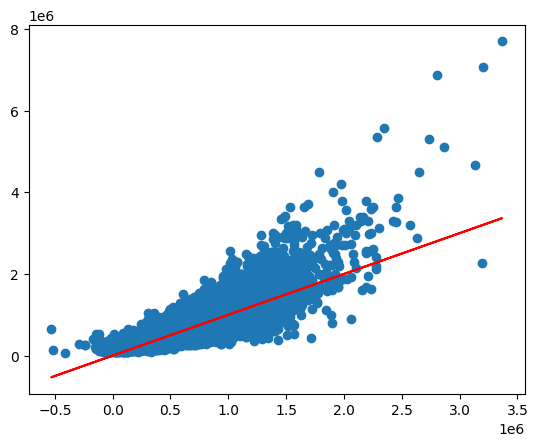

In [52]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)

plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [53]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

In [54]:
X_3_kc_prices.shape

(21613, 1330)

In [55]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8326020796592968

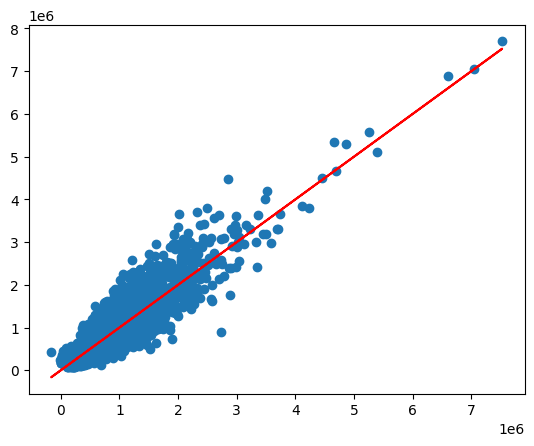

In [56]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)

plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

Degree 2: Time = 0.3503 sec, R² = 0.8084


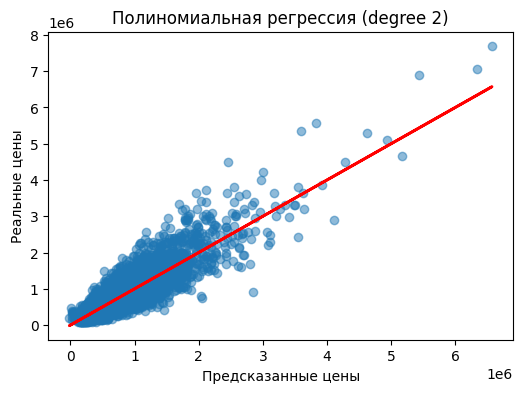

Degree 3: Time = 13.7994 sec, R² = 0.8326


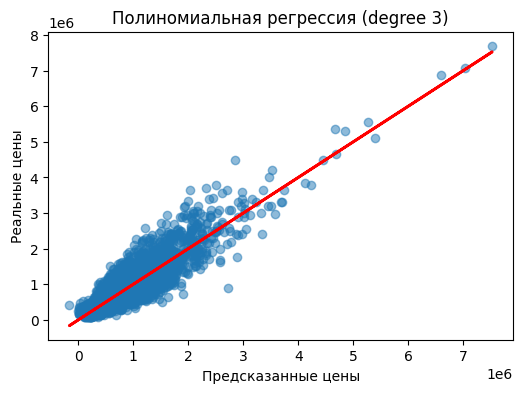


Сводная таблица результатов:
    Dataset               Model  Degree  Time (sec)     Score
0  kc_house  LogisticRegression       2    0.350342  0.808450
1  kc_house  LogisticRegression       3   13.799423  0.832602


In [63]:
# Самост. задание  То же самое проделайте с датасетом для классификации и "King county".
degrees = [2, 3]
results = []

for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    
    start_time = time.time()
    X_poly = poly.fit_transform(X_kc_prices)
    model = LinearRegression().fit(X_poly, y_kc_prices)
    elapsed = time.time() - start_time
    
    score = model.score(X_poly, y_kc_prices)
    results.append({"Dataset": "kc_house", "Model": "LogisticRegression", "Degree": deg, "Time (sec)": elapsed, "Score": score})
    print(f"Degree {deg}: Time = {elapsed:.4f} sec, R² = {score:.4f}")
    
    # Построение графика: сравнение предсказанных значений с реальными
    y_pred = model.predict(X_poly)
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, y_kc_prices, alpha=0.5)
    plt.plot(y_pred, y_pred, c='r', lw=2)
    plt.title(f"Полиномиальная регрессия (degree {deg})")
    plt.xlabel("Предсказанные цены")
    plt.ylabel("Реальные цены")
    plt.show()

# Вывод сводной таблицы результатов
results_kc_df = pd.DataFrame(results)
print("\nСводная таблица результатов:")
print(results_kc_df)


In [64]:
# Объединяем результаты в одну таблицу Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.
results_all = pd.concat([results_reg_df, results_class_df, results_kc_df], ignore_index=True)
print("\n=== Сводная таблица результатов ===")
print(results_all)


=== Сводная таблица результатов ===
              Dataset               Model  Degree  Time (sec)     Score
0      gen_regression    LinearRegression       5    0.001011  0.921748
1      gen_regression    LinearRegression      10    0.000997  0.922247
2      gen_regression    LinearRegression     100    0.009521  0.792462
3  gen_classification  LogisticRegression       5    0.008727  0.916000
4  gen_classification  LogisticRegression      10    0.015307  0.924000
5  gen_classification  LogisticRegression     100    0.074695  0.500000
6            kc_house  LogisticRegression       2    0.350342  0.808450
7            kc_house  LogisticRegression       3   13.799423  0.832602
